#  A6. Aplicación de redes neuronales artificiales para clasificación y regresión

In [6]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2.tar.gz (7.2 MB)
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      
      meson-python: error: Could not find meson version 0.63.3 or newer, found .
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ModuleNotFoundError: No module named 'seaborn'

## 1.- Carga de Datos

In [2]:
ruta = './diabetes.csv'

df = pd.read_csv(ruta)

FileNotFoundError: [Errno 2] No such file or directory: './diabetes.csv'

## 2.- Exploración de datos

In [9]:
df

,PatientID,Age,Sex,BMI,BloodPressure,S1,S2,S3,S4,S5,S6,DiseaseProgression
0,1,61.0,Male,41.3,71.7,90.4,76.5,37.7,77.9,98.3,99.9,49.4
1,2,53.0,Female,28.5,90.7,175.0,73.8,67.4,132.7,82.0,52.7,41.0
2,3,63.0,Male,33.6,80.2,102.2,95.6,32.1,87.7,133.0,NaN,45.8
3,4,73.0,Male,29.2,80.4,163.6,91.2,40.4,95.7,51.2,104.9,35.8
4,5,52.0,Male,30.5,68.0,98.6,100.0,35.4,32.5,43.9,84.6,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5145,3239,57.0,Female,29.4,84.6,155.2,89.9,37.7,39.6,163.3,51.2,59.4
5146,2975,66.0,Male,31.3,79.1,NaN,134.8,48.4,19.6,174.4,72.8,50.4
5147,3581,80.0,Female,18.9,NaN,212.3,106.2,57.8,50.2,118.2,64.9,43.7
5148,2888,72.0,Male,26.8,70.4,132.3,95.3,43.0,158.8,151.0,44.3,48.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PatientID           5150 non-null   int64  
 1   Age                 5150 non-null   float64
 2   Sex                 5150 non-null   object 
 3   BMI                 4894 non-null   float64
 4   BloodPressure       4894 non-null   float64
 5   S1                  4894 non-null   float64
 6   S2                  5150 non-null   float64
 7   S3                  5150 non-null   float64
 8   S4                  4896 non-null   float64
 9   S5                  5150 non-null   float64
 10  S6                  4891 non-null   float64
 11  DiseaseProgression  5142 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 482.9+ KB


### Observando los datos

Tras la primera exploración de los datos observamos cómo existen características cuyo label o nombre no resulta intuitivo.

Además observamos cómo existe una variable object que debe ser tratada con un label adecuado para convertirla en numérica y
pueda ser tratada computacionalmente. Se objerva algunos NaN en algunos registros, tanto en las 5 primeras columnas como en las 5 útilmas.
Tenemos un total de 5150 observaciones y *df.info()* nos arroja numeros inferiores al total de registros, por lo que tendremos que 
hacer una limpieza de datos NaN o nulos.

### Selección de características

In [13]:
# Renombramos las características con etiqueta ambigua

df = df.rename(columns={
    'S1': 'serum_cholesterol',
    'S2': 'ldl_level',
    'S3': 'hdl_level',
    'S4': 'triglycerides',
    'S5': 'blood_glucose',
    'S6': 'insulin_level'
})

In [16]:
# Eliminamos patienID, puesto que no aporta nada al computo, si bien es cierto que debiera guardarse este dato para saber qué paciente tiene tal predicción en la progresión de la enfermedad

df = df.drop('PatientID',axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5150 non-null   float64
 1   Sex                 5150 non-null   object 
 2   BMI                 4894 non-null   float64
 3   BloodPressure       4894 non-null   float64
 4   serum_cholesterol   4894 non-null   float64
 5   ldl_level           5150 non-null   float64
 6   hdl_level           5150 non-null   float64
 7   triglycerides       4896 non-null   float64
 8   blood_glucose       5150 non-null   float64
 9   insulin_level       4891 non-null   float64
 10  DiseaseProgression  5142 non-null   float64
dtypes: float64(10), object(1)
memory usage: 442.7+ KB


Observamos falta de datos en algunas caraterísticas. Posiblemente por contener valores nulos

### Nulos

In [17]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

Age                     0
Sex                     0
BMI                   256
BloodPressure         256
serum_cholesterol     256
ldl_level               0
hdl_level               0
triglycerides         254
blood_glucose           0
insulin_level         259
DiseaseProgression      8
dtype: int64


In [18]:
# Eliminar valores nulos y volver a comprobar
df.dropna(inplace=True)

In [19]:
print(df.isnull().sum())

Age                   0
Sex                   0
BMI                   0
BloodPressure         0
serum_cholesterol     0
ldl_level             0
hdl_level             0
triglycerides         0
blood_glucose         0
insulin_level         0
DiseaseProgression    0
dtype: int64


In [20]:
### Únicos

In [21]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Sex: ['Male' 'Female' 'female']


In [24]:
df['Sex'] = df['Sex'].replace({
    'male': 'Male',
    'Male': 'Male',
    'female': 'Female',
    'Female': 'Female'
})

# Volvemos a comprobar los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Sex: ['Male' 'Female']


### Duplicados

In [26]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 120


In [27]:
# Eliminar duplicados manteniendo uno
df = df.drop_duplicates()

# Comprobar el número de duplicados después de la eliminación
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")

Duplicados después de eliminar: 0


### Distribuciones

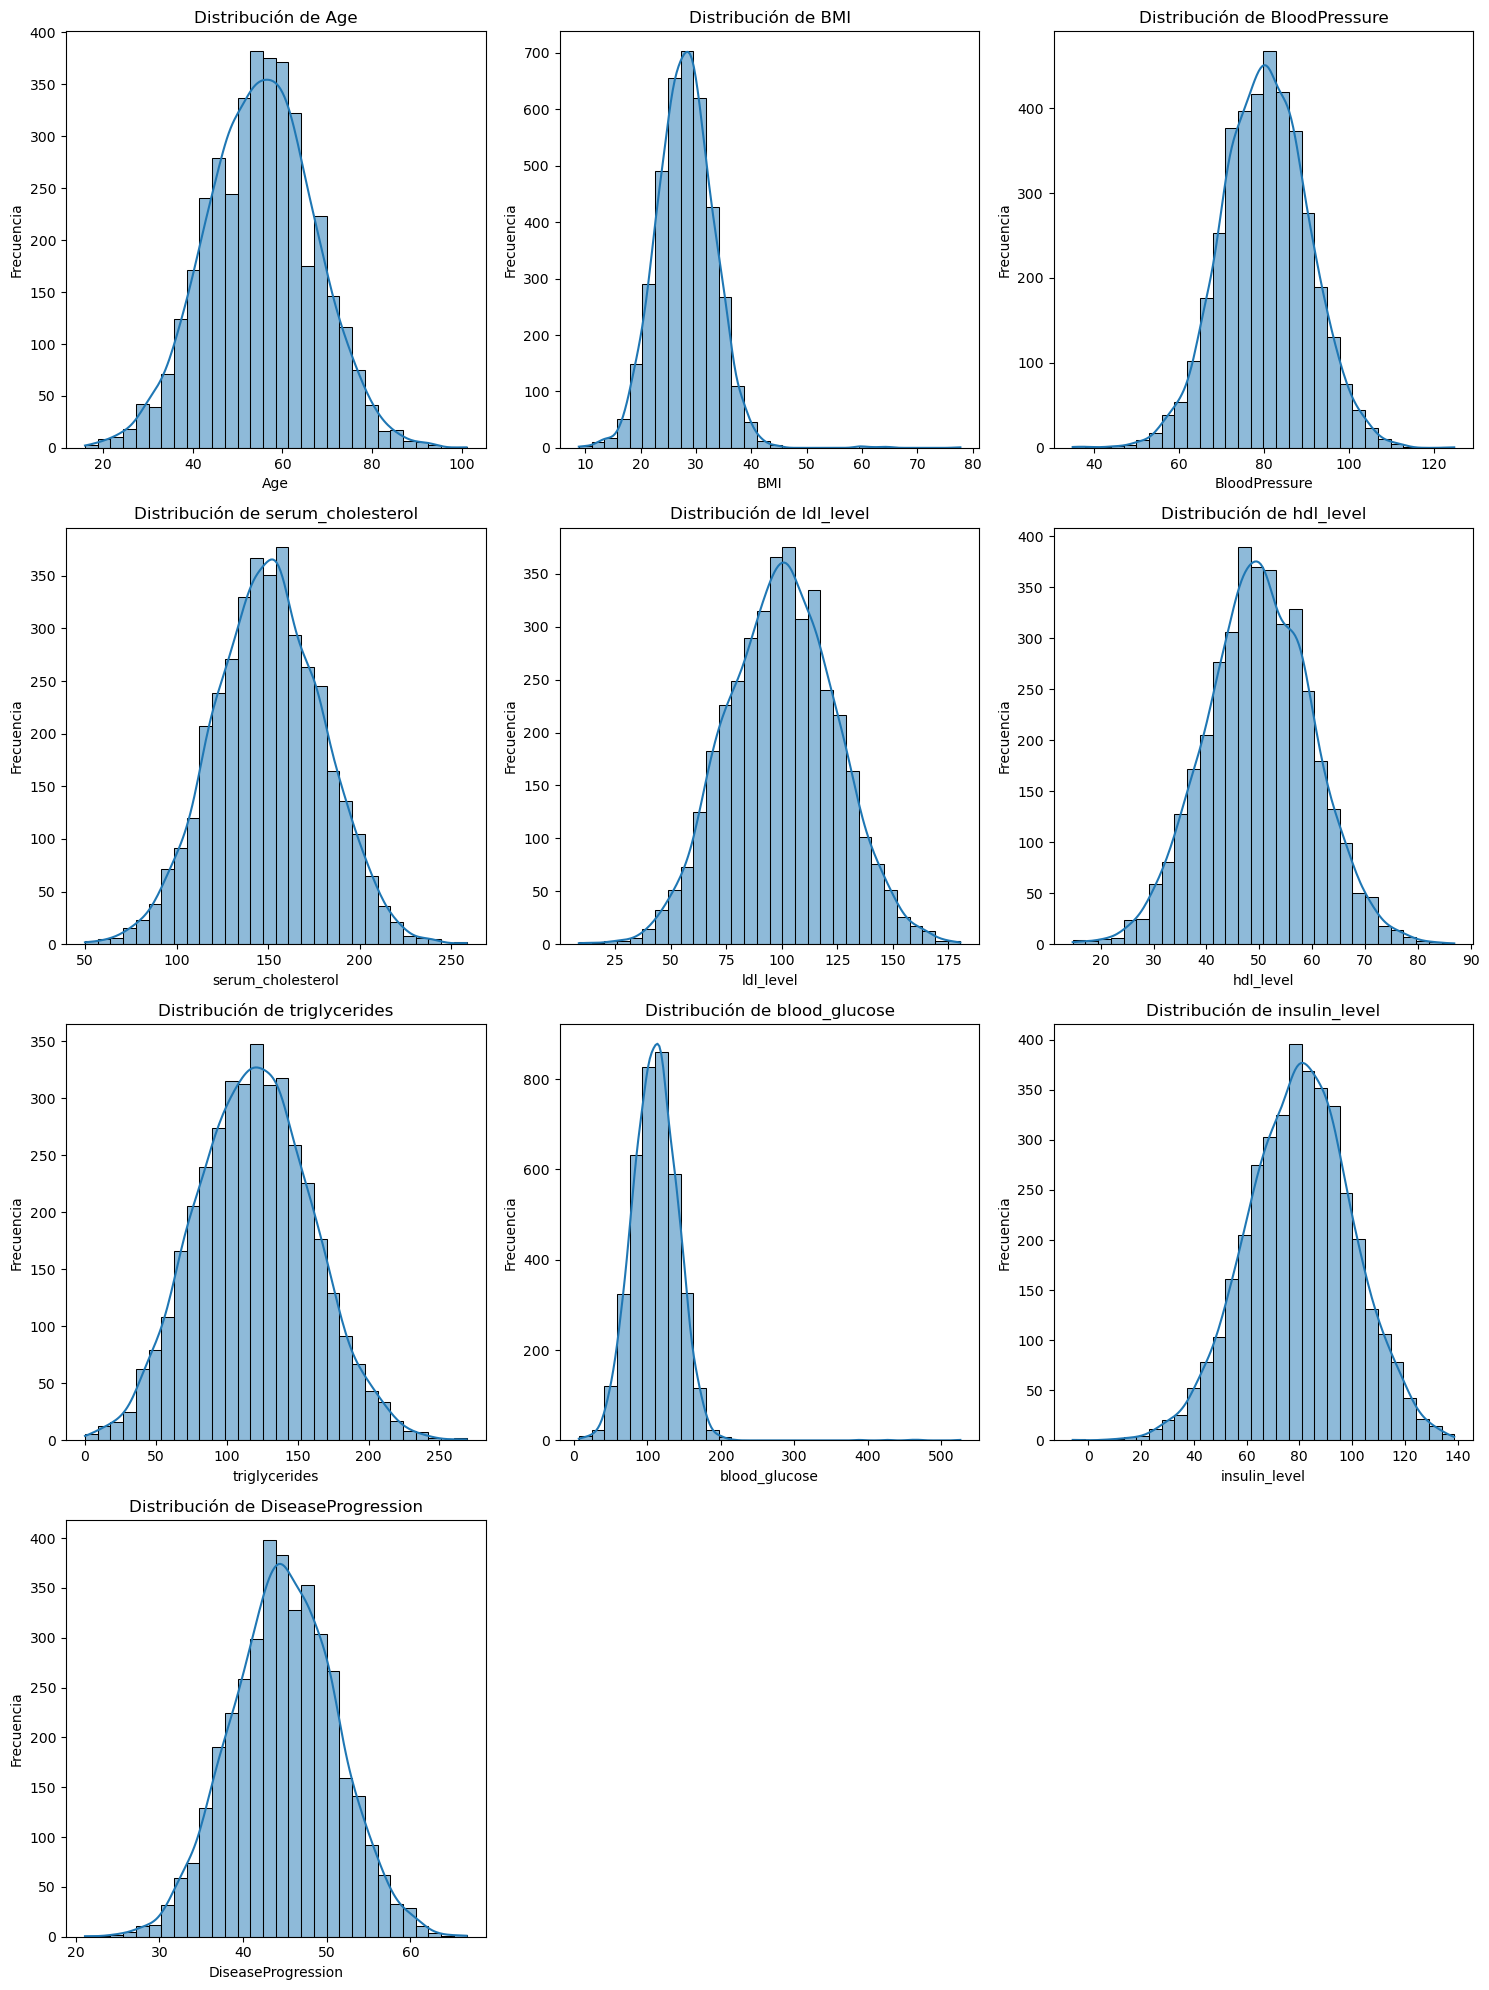

In [29]:
# Seleccionar solo las columnas numéricas de tipo int o float
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definir el número de columnas y filas para los subplots con 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Generar histogramas para cada variable numérica
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Histograma con línea KDE
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes vacíos si el número de variables es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

blood_glucose parece presentar una asimetría significativa hacia la izquierda. Podría requerir transformación logarítmica

/tmp/ipykernel_21128/2538132782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_glucose_log'] = np.log(df['blood_glucose'])


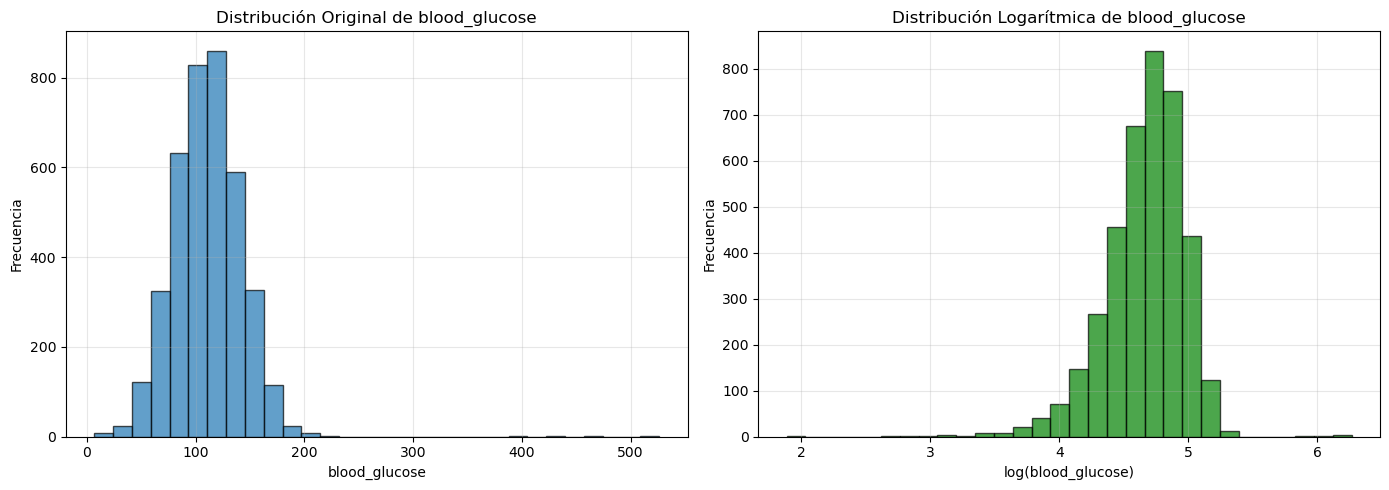

In [31]:
# Aplicamos tranformación logarítmica con asistencia de la IA

# Aplicar transformación logarítmica
# Nota: Se agrega 1 para evitar problemas con valores de 0 (si los hubiera)
df['blood_glucose_log'] = np.log(df['blood_glucose'])

# Visualizar la distribución original vs transformada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución original
axes[0].hist(df['blood_glucose'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('blood_glucose')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución Original de blood_glucose')
axes[0].grid(alpha=0.3)

# Distribución transformada
axes[1].hist(df['blood_glucose_log'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('log(blood_glucose)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución Logarítmica de blood_glucose')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Ahora presenta asimetria hacia la derecha (asimetría NEGATIVA). Procedemos a aplicar Raíz cuadrada: sqrt(blood_glucose) - más suave que el logaritmo

/tmp/ipykernel_21128/823679284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_glucose_sqrt'] = np.sqrt(df['blood_glucose'])


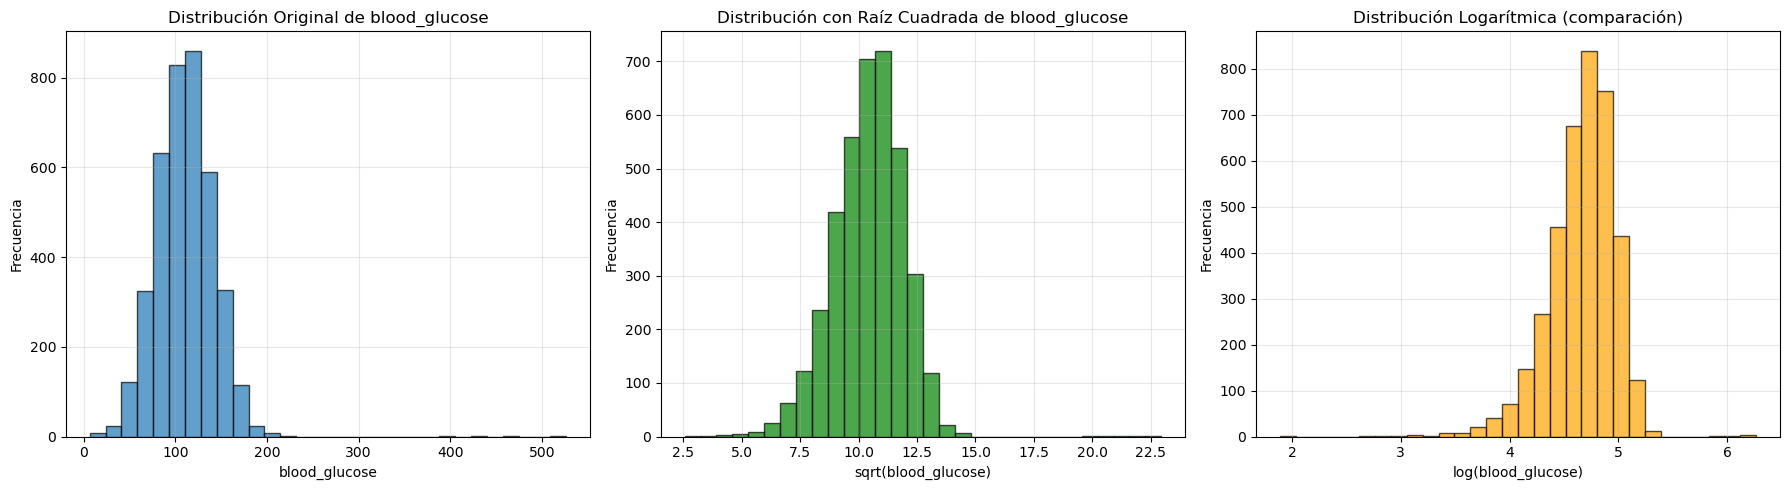

In [32]:
# Suponiendo que tienes tus datos en un DataFrame llamado 'df'
# df = pd.read_csv('tu_archivo.csv')

# Aplicar transformación de raíz cuadrada
df['blood_glucose_sqrt'] = np.sqrt(df['blood_glucose'])

# Visualizar la distribución original vs transformada
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución original
axes[0].hist(df['blood_glucose'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('blood_glucose')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución Original de blood_glucose')
axes[0].grid(alpha=0.3)

# Distribución transformada con raíz cuadrada
axes[1].hist(df['blood_glucose_sqrt'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('sqrt(blood_glucose)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución con Raíz Cuadrada de blood_glucose')
axes[1].grid(alpha=0.3)

# Distribución transformada logarítmica (para comparar)
axes[2].hist(np.log(df['blood_glucose']), bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[2].set_xlabel('log(blood_glucose)')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Distribución Logarítmica (comparación)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
# Todo a paunta a que la transformación de raíz cuadrada nos ofrece una distribución más asimetrica. Procedemos a establecer esta transformación en nuestro df

# Aplicar transformación de raíz cuadrada
df['blood_glucose'] = np.sqrt(df['blood_glucose'])

# Eliminamos características anteriores correspondientes al sondeo de blood_glucose
#df = df.drop(columns=['blood_glucose_sqrt'])
df = df.drop(columns=['blood_glucose_log'])


### Correlaciones con la variable objetivo


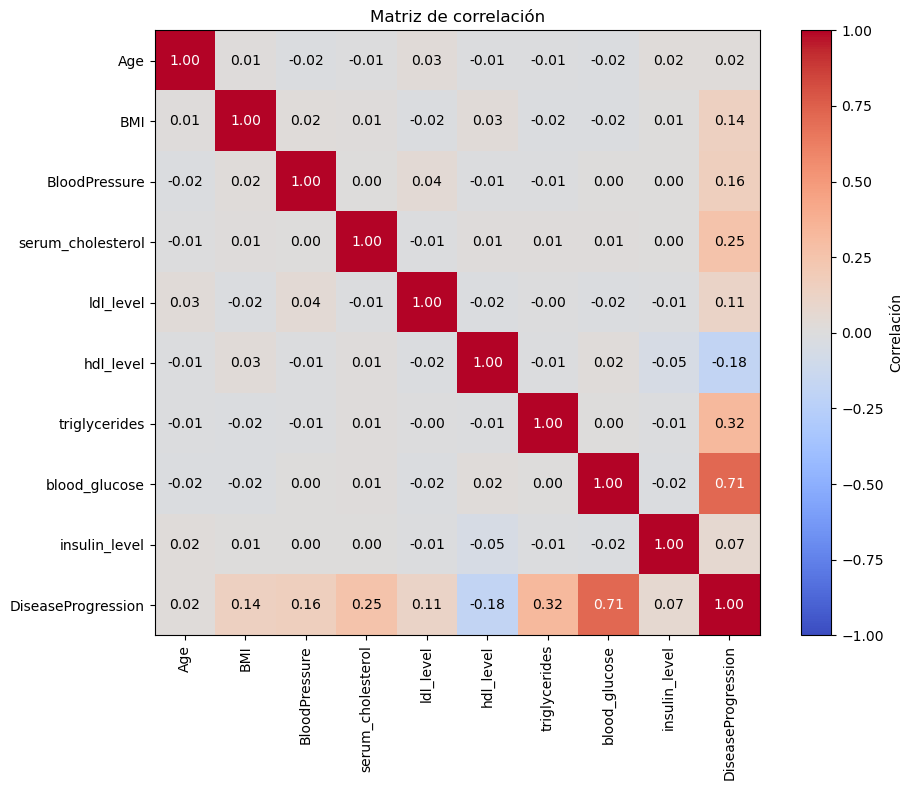

In [41]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=["float64", "int64"])

# Calcular matriz de correlación
correlation_matrix = df_numericas.corr()

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = df_numericas.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

Evidentemente, cuando más glucosa en sangre, mayor progresión de la enfermedad a medio-largo plazo

Excepto la edad y el nivel de insulina (cosa sorprendente que me hace preguntarme sobre la autenticidad de los datos que contiene el dataset) ,la mayoría presentan una correlación positiva mientras que hdl_level (cociente de colesterol) presenta una correlación lineal negativa.

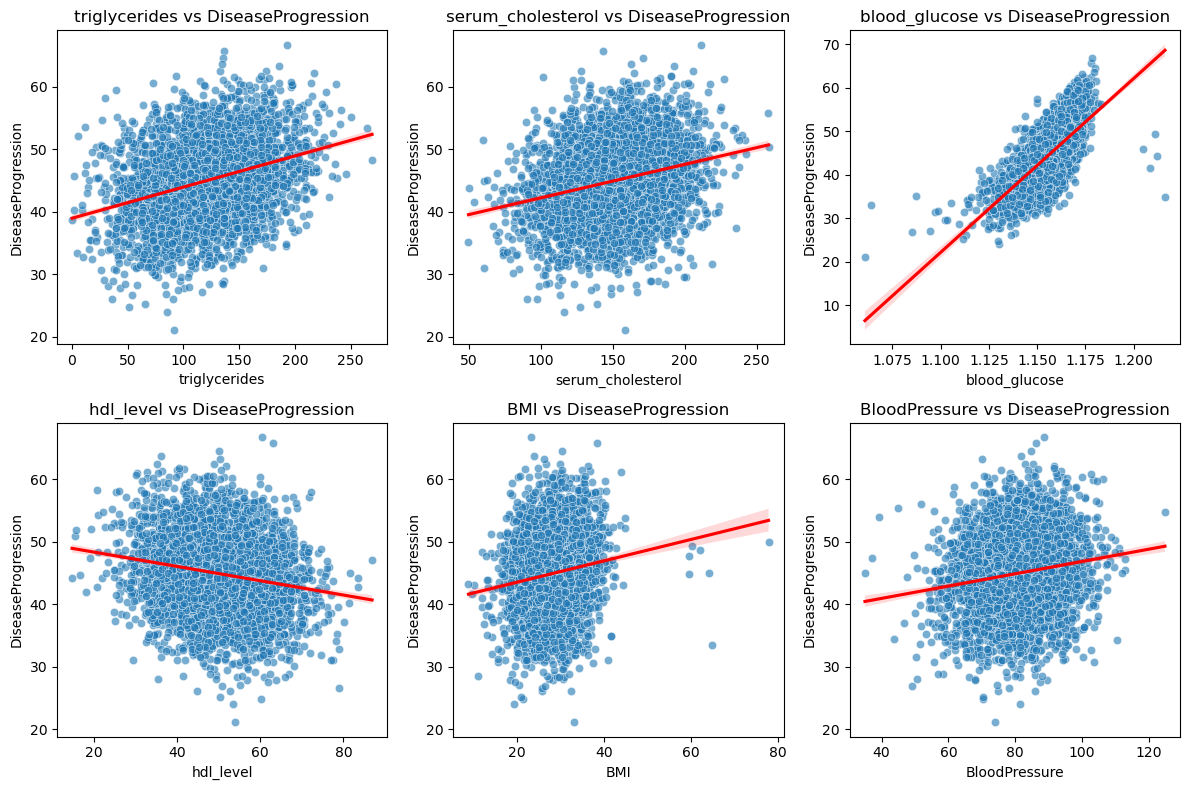

In [47]:
# trazamos gráficos lineales para alguna de estas variables:

numeric_features = ['triglycerides', 'serum_cholesterol', 'blood_glucose',
                    'hdl_level', 'BMI', 'BloodPressure']
target = 'DiseaseProgression'

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas
    sns.scatterplot(data=df, x=feature, y=target, alpha=0.6)
    sns.regplot(data=df, x=feature, y=target, scatter=False, color='red')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

Blood_glucose presenta una correlación lineal positiva clara. BMI, a pesar de ofrecer un 0,14 no está excesivamente correlacionada con nuestra variable objetivo.
Las demás presentan ligera correlación lineal, sin ser, individualmente, significativas.

### Equilibrio

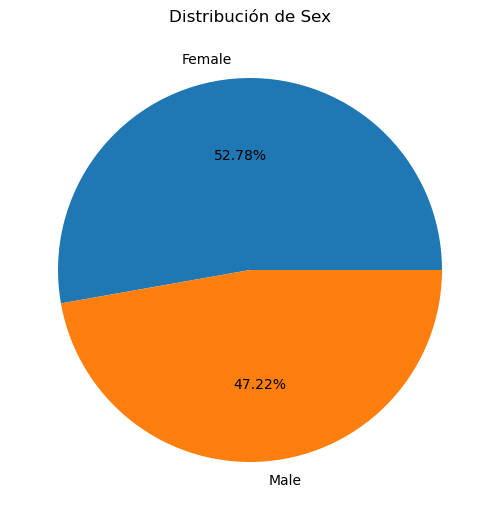

In [50]:
# Comprobamos si las variables categóricas están equilibradas

import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(cat_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 6 * num_rows))

# Aplanar los ejes para facilitar el recorrido
axes = axes.flatten()

# Generar gráficos de sectores para cada variable categórica
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    labels = counts.index.astype(str)

    axes[i].pie(counts, labels=labels, autopct='%.2f%%')
    axes[i].set_title(f'Distribución de {col}')

# Ocultar ejes vacíos si hay menos categorías que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Asumimos equilibrio en la variable género, sin especial inclinación por ninguno de los dos sexos.

### Outliers

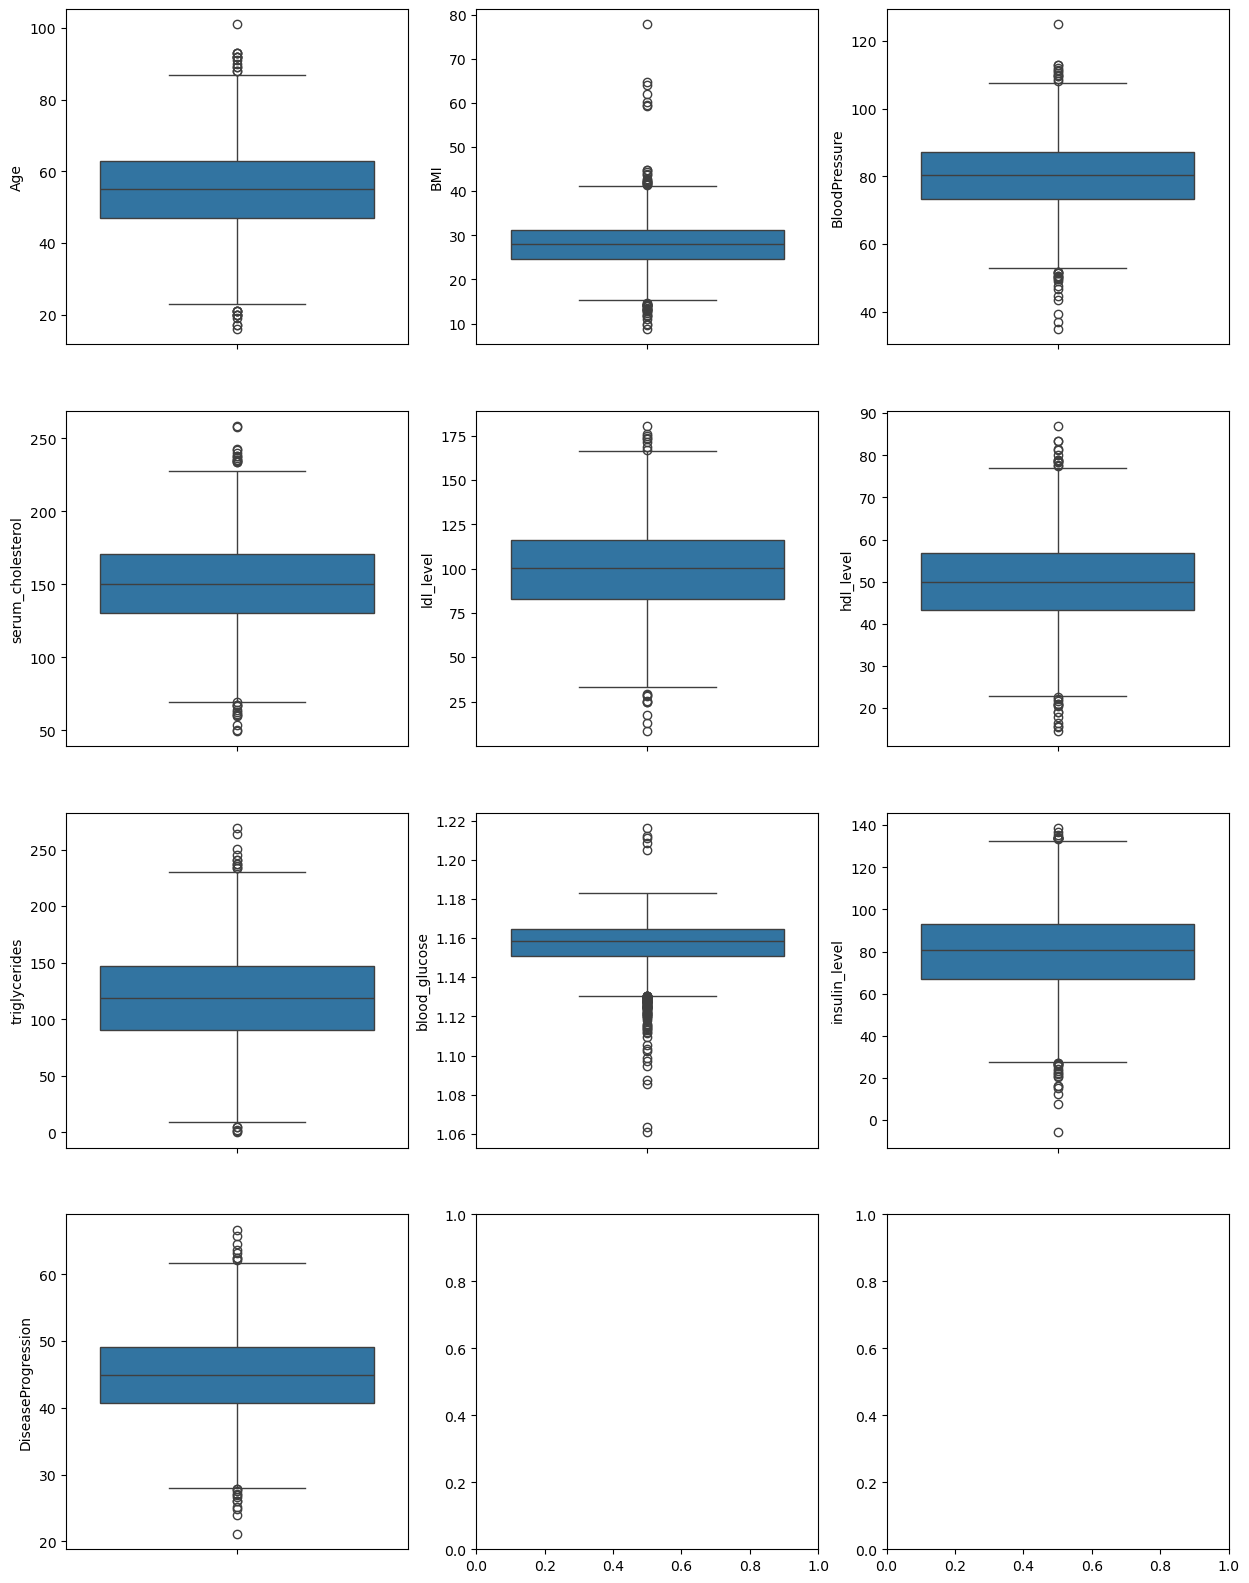

In [52]:
# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Generar boxplots para cada variable numérica
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title

In [53]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Contar el número de outliers por característica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el resultado
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
Age                   26
BMI                   48
BloodPressure         29
serum_cholesterol     25
ldl_level             17
hdl_level             27
triglycerides         16
blood_glucose         88
insulin_level         28
DiseaseProgression    20
dtype: int64


Parece que tenemos bastantes outliers, pero sin conocimiento biomédico adecuado, creo que lo más conveniente es no eliminarlos puesto que nos apoyamos en la credibilidad de las mediciones reales reflejadas en el dataset

## 3.- División de los datos

In [56]:
# División previa de los datos del dataframe. X serán las características e y será la columna objetivo
X = df.drop('DiseaseProgression', axis=1)
y = df['DiseaseProgression']

In [59]:
# División de los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df

,Age,Sex,BMI,BloodPressure,serum_cholesterol,ldl_level,hdl_level,triglycerides,blood_glucose,insulin_level,DiseaseProgression
0,61.0,Male,41.3,71.7,90.4,76.5,37.7,77.9,1.154163,99.9,49.4
1,53.0,Female,28.5,90.7,175.0,73.8,67.4,132.7,1.147643,52.7,41.0
3,73.0,Male,29.2,80.4,163.6,91.2,40.4,95.7,1.130875,104.9,35.8
4,52.0,Male,30.5,68.0,98.6,100.0,35.4,32.5,1.125452,84.6,28.1
6,74.0,Male,29.0,71.7,139.1,125.1,45.6,157.7,1.126866,80.2,38.9
...,...,...,...,...,...,...,...,...,...,...,...
4992,54.0,Female,34.4,93.3,144.4,111.2,35.9,128.0,1.154854,85.7,49.8
4994,47.0,Male,26.0,79.1,150.0,114.9,42.2,89.5,1.165717,87.8,47.8
4995,54.0,Male,13.0,97.8,150.9,56.0,43.3,89.5,1.151659,65.8,35.0
4996,64.0,Female,23.8,88.8,156.2,67.5,37.4,148.4,1.154090,65.0,47.0


### Encoders, escalado y transformación truncado

In [62]:
# Codificación one-hot para variables categóricas nominales
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

# Aseguramos que ambas matrices tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Guardar columnas tras codificación
X_train_columns = X_train.columns

# Escalado (solo para modelos que lo requieren)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

En relación a los encoders, utilizamos un labelEncoder debido a que la variable Sex no tiene orden (es nominal) y binaria. LabelEncoder es el más simple y lo único que pretendemos es convertir a números, susceptibles de cómputo, los diferentes géneros existentes en el dataset.

En cuanto a los scalers MinMaxScaler convierte los valores entre 1 y 0. Si aplicamos este MinMaxScaler, distorsionaríamos la métrica predictiva. Descartado.
Tras un repaso por las fuentes de conocimiento disponibles, observamos que RobustScaler es adecuado cuando existen outliers. Su escalado se vasa en operaciones con la mediana y el rango intercuartílico. Si formula es la que sigue:

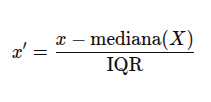

Debido a la presencia de outliers por los motivos anteriormente mencionados, hemos elegido RobustScaler.

## 4.- Entrenamiento del modelo y realización de las predicciones. 5.- Validación del modelo

- #### Regresión lineal

In [63]:
# Inicialización del regresor
regresor_LR = LinearRegression()

# Entrenamiento del modelo
regresor_LR.fit(X_train, y_train)

# Realización de predicciones
predicciones_LR = regresor_LR.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_LR = r2_score(y_test, predicciones_LR)
mse_LR = mean_squared_error(y_test, predicciones_LR)
rmse_LR = np.sqrt(mse_LR)

print('R^2:', r2_LR)
print('RMSE:', rmse_LR)

R^2: 0.7913049751110137
RMSE: 2.8658399374138193


## 4.- Entrenamiento del modelo y realización de las predicciones. 5.- Validación del modelo

- #### SVR

In [64]:
# Inicialización del regresor
regresor_SVM = SVR()

# Entrenamiento del modelo
regresor_SVM.fit(X_train, y_train)

# Realización de predicciones
predicciones_SVM = regresor_SVM.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_SVM = r2_score(y_test, predicciones_SVM)
mse_SVM = mean_squared_error(y_test, predicciones_SVM)
rmse_SVM = np.sqrt(mse_SVM)

print('R^2:', r2_SVM)
print('RMSE:', rmse_SVM)

R^2: 0.773571890153274
RMSE: 2.9851149067356846


## 4.- Entrenamiento del modelo y realización de las predicciones. 5.- Validación del modelo

- #### DT

In [65]:
# Inicialización del regresor
regresor_DT = DecisionTreeRegressor(random_state=42)

# Entrenamiento del modelo
regresor_DT.fit(X_train, y_train)

# Realización de predicciones
predicciones_DT = regresor_DT.predict(X_test)

# Cálculo de distintas métricas de rendimiento
r2_DT = r2_score(y_test, predicciones_DT)
mse_DT = mean_squared_error(y_test, predicciones_DT)
rmse_DT = np.sqrt(mse_DT)

print('R^2:', r2_DT)
print('RMSE:', rmse_DT)

R^2: 0.538007135224417
RMSE: 4.263963875437324


## 4.- Entrenamiento del modelo y realización de las predicciones. 5.- Validación del modelo

- #### RF

In [66]:
# Inicializar el modelo de regresión Random Forest
regresor_RF = RandomForestRegressor(random_state=42)

# Entrenamiento del modelo
regresor_RF.fit(X_train, y_train)

# Realización de predicciones
predicciones_RF = regresor_RF.predict(X_test)

# Cálculo de métricas de rendimiento
r2_RF = r2_score(y_test, predicciones_RF)
mse_RF = mean_squared_error(y_test, predicciones_RF)
rmse_RF = np.sqrt(mse_RF)

print('R^2:', r2_RF)
print('RMSE:', rmse_RF)

R^2: 0.7894674927315076
RMSE: 2.8784286179477663


## 4.- Entrenamiento del modelo y realización de las predicciones. 5.- Validación del modelo

- ##### Adaboost

In [67]:
# Inicializar el modelo de regresión AdaBoost
regresor_AB = AdaBoostRegressor(random_state=42)

# Entrenamiento del modelo
regresor_AB.fit(X_train, y_train)

# Realización de predicciones
predicciones_AB = regresor_AB.predict(X_test)

# Cálculo de métricas de rendimiento
r2_AB = r2_score(y_test, predicciones_AB)
mse_AB = mean_squared_error(y_test, predicciones_AB)
rmse_AB = np.sqrt(mse_AB)

print('R^2:', r2_AB)
print('RMSE:', rmse_AB)

R^2: 0.738859992805196
RMSE: 3.2057716833496253


### Comparativa de métricas

In [69]:
# by gemini:

# Create a dictionary with the model names and their initial metrics
model_metrics = {
    'Modelo': ['Regresión Lineal', 'AdaBoost', 'Random Forest', 'Árbol de Decisión', 'SVR', 'DT'],
    'R²': [r2_LR, r2_AB, r2_RF, r2_DT, r2_SVM, r2_DT],
    'RMSE': [rmse_LR, rmse_AB, rmse_RF, rmse_DT, rmse_SVM, rmse_DT]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics)

# Format the R² and RMSE columns to two decimal places
metrics_df['R²'] = metrics_df['R²'].map('{:.4f}'.format)
metrics_df['RMSE'] = metrics_df['RMSE'].map('{:.2f}'.format)

# Display the DataFrame as a markdown table
display(metrics_df)

,Modelo,R²,RMSE
0,Regresión Lineal,0.7913,2.87
1,AdaBoost,0.7389,3.21
2,Random Forest,0.7895,2.88
3,Árbol de Decisión,0.5380,4.26
4,SVR,0.7736,2.99
5,DT,0.5380,4.26


## Fase 6: Optimización del modelo y Fase 7: Validación del nuevo modelo 

- #### Regresión Líneal

In [70]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir la rejilla de valores para alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]
}

# Inicializar el modelo de regresión Ridge
regressor_RL2 = Ridge()

# Configurar búsqueda en rejilla con validación cruzada
grid_search_RL2 = GridSearchCV(
    estimator=regressor_RL2,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

# Ajustar el modelo sobre los datos de entrenamiento
grid_search_RL2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_RL2 = grid_search_RL2.best_estimator_

# Realizar predicciones
predicciones_RL2 = regressor_RL2.predict(X_test)

# Calcular métricas
r2_RL2 = r2_score(y_test, predicciones_RL2)
mse_RL2 = mean_squared_error(y_test, predicciones_RL2)
rmse_RL2 = np.sqrt(mse_RL2)

print('R^2:', r2_RL2)
print('RMSE:', rmse_RL2)

R^2: 0.7911020520458516
RMSE: 2.867232888031851


## Fase 6: Optimización del modelo y Fase 7: Validación del nuevo modelo 

- #### SVR

In [71]:
# Definir la rejilla de hiperparámetros
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Inicializar el modelo SVR
regressor_SVR2 = SVR()

# Búsqueda en rejilla con validación cruzada
grid_search_SVR2 = GridSearchCV(regressor_SVR2, param_grid, cv=5, scoring='r2')
grid_search_SVR2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_SVR2 = grid_search_SVR2.best_estimator_

# Realizar predicciones
predicciones_SVR2 = regressor_SVR2.predict(X_test)

# Calcular métricas
r2_SVR2 = r2_score(y_test, predicciones_SVR2)
mse_SVR2 = mean_squared_error(y_test, predicciones_SVR2)
rmse_SVR2 = np.sqrt(mse_SVR2)

print('R^2:', r2_SVR2)
print('RMSE:', rmse_SVR2)

R^2: 0.8150084342576475
RMSE: 2.698185764786023


## Fase 6: Optimización del modelo y Fase 7: Validación del nuevo modelo 

- #### DT

In [72]:
import warnings

# Desactivar todos los avisos
warnings.filterwarnings("ignore")

# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'mae'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
regressor_DT2 = DecisionTreeRegressor(random_state=42)

# Búsqueda en rejilla con validación cruzada
grid_search_DT2 = GridSearchCV(estimator=regressor_DT2, param_grid=param_grid, cv=5)
grid_search_DT2.fit(X_train, y_train)

# Obtener el mejor modelo
regressor_DT2 = grid_search_DT2.best_estimator_
print("Mejores hiperparámetros:", grid_search_DT2.best_params_)

# Predicciones
predicciones_DT2 = regressor_DT2.predict(X_test)

# Métricas
r2_DT2 = r2_score(y_test, predicciones_DT2)
mse_DT2 = mean_squared_error(y_test, predicciones_DT2)
rmse_DT2 = np.sqrt(mse_DT2)

print('R^2:', r2_DT2)
print('RMSE:', rmse_DT2)

Mejores hiperparámetros: {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
R^2: 0.6389571306511913
RMSE: 3.7694264059894613


## Fase 6: Optimización del modelo y Fase 7: Validación del nuevo modelo 

- #### RF

In [73]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],              # Número de árboles en el bosque
    'criterion': ['absolute_error'],         # Método para calcular las divisiones
    'max_depth': [5, 10],                    # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2],                 # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']         # Número máximo de características a considerar
}

# Inicializar el modelo de Random Forest
regressor_RF2 = RandomForestRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_RF2 = GridSearchCV(
    estimator=regressor_RF2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_RF2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_RF2 = grid_search_RF2.best_estimator_
print("Mejores hiperparámetros:", grid_search_RF2.best_params_)

# Predicciones
predicciones_RF2 = regressor_RF2.predict(X_test)

# Métricas de rendimiento
r2_RF2 = r2_score(y_test, predicciones_RF2)
mse_RF2 = mean_squared_error(y_test, predicciones_RF2)
rmse_RF2 = np.sqrt(mse_RF2)

print('R^2:', r2_RF2)
print('RMSE:', rmse_RF2)

Mejores hiperparámetros: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R^2: 0.7620430870085562
RMSE: 3.0601664232761188


## Fase 6: Optimización del modelo y Fase 7: Validación del nuevo modelo 

- #### AdaBoost

In [74]:
# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],                   # Número de iteraciones (modelos débiles)
    'learning_rate': [0.01, 0.1, 1.0],                # Tasa de aprendizaje
    'estimator': [DecisionTreeRegressor(max_depth=3)]  # Estimador base
}

# Inicializar el modelo de AdaBoost
regressor_AB2 = AdaBoostRegressor(random_state=42)

# Configurar la búsqueda en rejilla
grid_search_AB2 = GridSearchCV(
    estimator=regressor_AB2,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Ajustar la búsqueda al conjunto de entrenamiento
grid_search_AB2.fit(X_train, y_train)

# Mejor modelo encontrado
regressor_AB2 = grid_search_AB2.best_estimator_
print("Mejores hiperparámetros:", grid_search_AB2.best_params_)

# Predicciones
predicciones_AB2 = regressor_AB2.predict(X_test)

# Métricas de rendimiento
r2_AB2 = r2_score(y_test, predicciones_AB2)
mse_AB2 = mean_squared_error(y_test, predicciones_AB2)
rmse_AB2 = np.sqrt(mse_AB2)

print('R^2:', r2_AB2)
print('RMSE:', rmse_AB2)

Mejores hiperparámetros: {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 200}
R^2: 0.7630001423742516
RMSE: 3.054006275563578


Tabla de contraste. Modelos por defecto VS Modelos optimizados

In [85]:
# by gemini:

# Create a dictionary with the model names and their initial metrics
model_metrics2 = {
    'Modelo': ['Regresión Lineal', 'AdaBoost', 'Random Forest', 'Árbol de Decisión', 'SVR', 'DT'],
    'R²': [r2_RL2, r2_AB2, r2_RF2, r2_DT2, r2_SVR2, r2_DT2],
    'RMSE': [rmse_RL2, rmse_AB2, rmse_RF2, rmse_DT2, rmse_SVR2, rmse_DT2]
}

# Create a pandas DataFrame from the dictionary
metrics_df2 = pd.DataFrame(model_metrics2)

# Format the R² and RMSE columns to two decimal places
metrics_df2['R²'] = metrics_df2['R²'].map('{:.4f}'.format)
metrics_df2['RMSE'] = metrics_df2['RMSE'].map('{:.2f}'.format)

# Display the DataFrame as a markdown table
print("\n")
print("MODELOS SIN OPTIMIZAR \n")
display(metrics_df)

print("\n")
print("MODELOS OPTIMIZADOS \n")
display(metrics_df2)



MODELOS SIN OPTIMIZAR 



,Modelo,R²,RMSE
0,Regresión Lineal,0.7913,2.87
1,AdaBoost,0.7389,3.21
2,Random Forest,0.7895,2.88
3,Árbol de Decisión,0.5380,4.26
4,SVR,0.7736,2.99
5,DT,0.5380,4.26




MODELOS OPTIMIZADOS 



,Modelo,R²,RMSE
0,Regresión Lineal,0.7911,2.87
1,AdaBoost,0.7630,3.05
2,Random Forest,0.7620,3.06
3,Árbol de Decisión,0.6390,3.77
4,SVR,0.8150,2.70
5,DT,0.6390,3.77
